# Will the label with the most artists have significantly different scores than the labels with 1 artist? Two Tailed Test
H<sub>0</sub>: The label with the most artists will not have significantly different scores than the labels with 1 artist.

p-value = .05

# Data Extraction

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

db_path = 'postgres:///music'
engine = create_engine(db_path)

table_names = engine.table_names()

table_names

['reviews', 'artists', 'genres', 'labels', 'years', 'content']

# Data Investigation

In [3]:
def postgres_to_df(table):
    """Selects data from passed table and returns a dataframe of the data"""
    engine = create_engine(db_path)
    conn = engine.connect()
    result = conn.execute(f'''
    SELECT * FROM {table}''')
    columns = [x for x in result.keys()]
    df = pd.DataFrame(result.fetchall(),columns=columns)
    return df

In [4]:
postgres_to_df('reviews')

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
5,22722,insecure (music from the hbo original series),various artists,http://pitchfork.com/reviews/albums/22722-inse...,7.4,0,vanessa okoth-obbo,contributor,2017-01-05,3,5,1,2017
6,22704,stillness in wonderland,little simz,http://pitchfork.com/reviews/albums/22704-litt...,7.1,0,katherine st. asaph,contributor,2017-01-05,3,5,1,2017
7,22694,tehillim,yotam avni,http://pitchfork.com/reviews/albums/22694-tehi...,7.0,0,andy beta,contributor,2017-01-05,3,5,1,2017
8,22714,reflection,brian eno,http://pitchfork.com/reviews/albums/22714-refl...,7.7,0,andy beta,contributor,2017-01-04,2,4,1,2017
9,22724,filthy america its beautiful,the lox,http://pitchfork.com/reviews/albums/22724-filt...,5.3,0,ian cohen,contributor,2017-01-04,2,4,1,2017


# Data Manipulation

In [5]:
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute('''
SELECT * FROM reviews
    JOIN labels ON reviews.reviewid = labels.reviewid
    ''')
columns = [x for x in result.keys()]
df_whole = pd.DataFrame(result.fetchall(), columns=columns)

In [6]:
#select self released
df_whole.head()


,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid,label
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,22703,virgin
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,22721,hathenter
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,fashionable idiots
3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,22659,static shock
4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,22661,mississippi


In [7]:
df_self_released = df_whole[df_whole['label'] == 'drag city']

In [8]:
df_self_released.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,reviewid,label
138,22630,highway songs,papa m,http://pitchfork.com/reviews/albums/22630-high...,7.4,0,marc masters,contributor,2016-11-19,5,19,11,2016,22630,drag city
268,22479,motor earth,axis: sova,http://pitchfork.com/reviews/albums/22479-moto...,6.7,0,john s.w. macdonald,contributor,2016-10-22,5,22,10,2016,22479,drag city
295,22339,high bias,purling hiss,http://pitchfork.com/reviews/albums/22339-high...,6.8,0,marc masters,contributor,2016-10-15,5,15,10,2016,22339,drag city
416,22360,the wink,tim presley,http://pitchfork.com/reviews/albums/22360-the-...,7.8,0,laura snapes,contributor,2016-09-15,3,15,9,2016,22360,drag city
1017,21636,crab day,cate le bon,http://pitchfork.com/reviews/albums/21636-crab...,8.1,0,laura snapes,contributor,2016-04-15,4,15,4,2016,21636,drag city


# Random Sampling

In [9]:
np.random.seed(1)

sample_most_artists = np.random.choice(df_self_released.score,size=200)
sample_most_artists

array([7.8, 8. , 7.8, 8.3, 7.7, 6. , 5.7, 7.3, 8. , 6. , 5.9, 6.4, 7.5,
       6.2, 7.8, 7.2, 6.2, 8.2, 6.8, 7.5, 7.5, 7.5, 6.7, 5.8, 7.5, 5. ,
       7.5, 8.2, 8.3, 6.6, 8. , 6.4, 7.8, 7.5, 7.4, 8.1, 7.8, 7. , 7.3,
       5.8, 7.6, 7.5, 6.7, 8. , 7.5, 5.8, 7.6, 6.2, 8.7, 8.2, 8.2, 7.2,
       7.7, 7.9, 6.4, 7.8, 7.3, 7.8, 8. , 5. , 7.1, 7.9, 7.7, 9.1, 9.3,
       7.3, 6.8, 7.4, 5.2, 7.7, 6.8, 5.2, 7.3, 7.5, 7.5, 7.1, 6.6, 7.5,
       6.8, 7.6, 3.3, 7. , 7. , 5.7, 7.3, 2.4, 7.3, 4.5, 7.5, 6.1, 7.9,
       6.6, 2.4, 6.1, 6. , 6.8, 7.7, 9.4, 6.9, 7.3, 6.1, 8.5, 7. , 7.8,
       7.1, 8.2, 7.5, 5.8, 7.7, 7.3, 7. , 7.9, 8.2, 8. , 6.5, 7. , 7.6,
       7.5, 7.4, 7. , 6.9, 8.5, 8.2, 7.5, 8. , 7.9, 8.6, 8.6, 5.2, 7.6,
       7.6, 7.7, 5.7, 5.1, 7.7, 7.4, 7.5, 6.7, 6.1, 8.2, 6.1, 9.1, 6.2,
       7.3, 7. , 7.9, 8.7, 7.2, 7.8, 8.1, 6.9, 7. , 6. , 7.8, 7.3, 4.8,
       8. , 7.4, 7.5, 7.4, 7.7, 6.5, 6.3, 8.7, 6.7, 8. , 6.8, 8.5, 7.2,
       7.3, 8.1, 6.6, 7.4, 6.6, 7.9, 8.2, 7.3, 6.5, 7.3, 7.4, 7.

In [10]:
#join reviews table with labels table
engine = create_engine(db_path)
conn = engine.connect()
result = conn.execute('''
SELECT AVG(reviews.score), labels.label, COUNT(reviews.reviewid) FROM reviews
    JOIN labels ON reviews.reviewid = labels.reviewid
    GROUP BY labels.label
    ORDER BY COUNT(reviews.reviewid) DESC''')
columns = [x for x in result.keys()]
df_joined_counted_summed = pd.DataFrame(result.fetchall(),columns=columns)

In [11]:
df_joined_counted_summed.head()

,avg,label,count
0,6.917619,self-released,420
1,7.170221,drag city,272
2,7.116791,sub pop,268
3,7.061885,thrill jockey,244
4,7.291213,merge,239


In [12]:
df_one_artist = df_joined_counted_summed[df_joined_counted_summed['count'] == 1]

In [13]:
np.random.seed(1)
sample_one_artist = np.random.choice(df_one_artist['avg'], size=200)
sample_one_artist

array([ 8.10000038,  7.5999999 ,  6.80000019,  7.        ,  7.9000001 ,
        7.80000019,  7.0999999 ,  7.19999981,  7.80000019,  7.0999999 ,
        6.5999999 ,  8.39999962,  6.5       ,  7.69999981,  7.69999981,
        6.0999999 ,  7.        ,  3.5       ,  7.0999999 ,  7.5       ,
        6.80000019,  6.5999999 ,  5.9000001 ,  6.9000001 ,  6.        ,
       10.        ,  8.10000038,  7.        ,  7.5       ,  6.30000019,
        7.9000001 ,  7.5999999 ,  7.0999999 ,  7.4000001 ,  8.        ,
        6.9000001 ,  7.        ,  6.69999981,  7.        ,  6.19999981,
        6.9000001 ,  7.30000019,  7.        ,  6.5       ,  8.10000038,
        5.9000001 ,  8.        ,  7.30000019,  6.80000019,  5.5       ,
        2.0999999 ,  5.80000019,  6.80000019,  7.4000001 ,  7.30000019,
        8.        ,  8.5       ,  7.4000001 ,  7.69999981,  5.30000019,
        6.69999981,  7.5999999 ,  6.80000019,  8.10000038,  7.80000019,
        5.80000019,  7.30000019,  7.80000019,  7.        ,  6.59

# Sampling Distributions

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


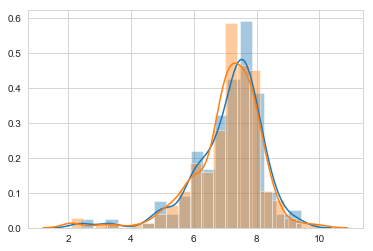

In [14]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

sns.distplot(sample_most_artists)
sns.distplot(sample_one_artist)

# Sampling Statistics

In [15]:
from scipy import stats

stats.ttest_ind(sample_most_artists, sample_one_artist)

Ttest_indResult(statistic=0.3773361570767518, pvalue=0.7061249300073693)

# Conclusion:
Since our p-value is above the threshold of .05, we cannot reject the null hypothesis in favor of the alternative hypothesis. This means that the label with the most artists does not generate scores significantly different from labels with one artist.

In [17]:
sample_size = 200
most_artists_mean = np.mean(sample_most_artists)
most_artists_sd = np.std(sample_most_artists)
one_artist_mean = np.mean(sample_one_artist)
one_artist_sd = np.std(sample_one_artist)

n_sim = 1000

np.random.seed(1)
p = np.empty(n_sim)
p.fill(np.nan)

for x in range(n_sim):
    most_artists = np.random.normal(loc=most_artists_mean, scale=most_artists_sd, size=sample_size)
    one_artist = np.random.normal(loc=one_artist_mean, scale=one_artist_sd, size=sample_size)
    t_test = stats.ttest_ind(most_artists, one_artist)
    p[x] = t_test[1]
    
num_null_rejects = np.sum(p < .05)
reject_proportion = num_null_rejects / n_sim
reject_proportion
    


If a large effect is truly present between the sample of most artists label and the sample of least artists labels groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 7.5% of times. This confirms that the label with the most artists does not generate scores significantly different from the labels with one artist signed.